## Abstract

## Extensive Feature Extraction for Stock Prediction

Forcasting Future Stock prices is a very hard problem to solve. An efficient Predictive model to correctly forecast future trend is crucial for Hedge funds and algorithmic trading. Specially in the case of Algorithmic Trading where error should me minimal as millions of dollars are at stake for each trade. Portfolio Optimization strategies needs to be backtested on historical data after predicting furture stock prices. 

Stock prices depends upon many factors like the Market behavious, other stocks, Index funds, Global news etc. We will try to capture many of these in our features.

In this project, we will look at this problem in many ways to Predict the Closing Prices - 
- 1. We will start with Extracting Features and see which performs well for predicting each stock. We will extract various Technical Indicators described below. 

- 2. Then check coorelation and Perform feature selection using RFECV Recursive feature Elimination using Random Forest to select best features. 

- 3. Then we will create a pipeline for this feature extraction and convert the entire code into Pipeline so anyone can easily run it and get the extracted features data for each stock. 

- 4. Next we will use Time Lagged data as a feature and create features based on previous day closing prices, Previous days Index funds prices. 

- 5. Then we will train 4 different Algorithms - Linear Regression, Random Forest, XG Boost, LSTM and GRU for forcasting nexy day price and test and evalute it on historical stock data. 

- 6. We will also create a Pipeline for this to train many stocks with many algorithms in just one go. 

- 7. We will Evaluate the data on around 2 years of data which is a long period, so it our models are closer overall, means we are doing great. Metrics we will use are MAE, MAPE, R2 and RMSE. Final Metrics which we will look at to compare models is MAE(Mean Absolute Error)

- 8. We will also check feature importance of various features using Random forest and XG boost in this. 

- 9. We will pick the best algorithm from these, and will tune the Number of lagged days to consider for forcasting for each type like Stock price, other index Funds previous prices. 

- 10. For LSTM, we will use Lagged previous days prices for a lookback period of 30-60 days. 

- 11. Then we will create a Portfolio of these stocks and will build a strategy using sharpe ratio to optimize the portfolio and allocate the money of a fund effectively. 

- 12. As a future scope, we will also try to create a dashboard to Show the comparison of 2 portfolios before and after optimization. 


## Feature Extraction

We will create features using various Technical indicators and Lagged prices as described below. All of these features have something to offer for forcasting. Some tells us about the trend, some gives us a signal if the stock is overbought or oversold, some portrays the strength of the price trend. 

#### Bollinger Bands
A Bollinger Band® is a technical analysis tool defined by a set of lines plotted two standard deviations (positively and negatively) away from a simple moving average (SMA) of the Stocks's price
Bollinger Bands allow traders to monitor and take advantage of shifts in price volatilities

Main Components of a Bollinger Bands
- Upper Band: The upper band is simply two standard deviations above the moving average of a stock’s price.
- Middle Band: The middle band is simply the moving average of the stock’s price.
- Lower Band: Two standard deviations below the moving average is the lower band.

#### Simple Moving Average (SMA)
A simple moving average (SMA) calculates the average of a selected range of prices, usually closing prices, by the number of periods in that range.
SMA is basically the average price of the given time period, with equal weighting given to the price of each period.
Formula: SMA = ( Sum ( Price, n ) ) / n

#### Exponential moving average (EMA)
An exponential moving average (EMA) is a type of moving average (MA) that places a greater weight and significance on the most recent data points. The exponential moving average is also referred to as the exponentially weighted moving average. An exponentially weighted moving average reacts more significantly to recent price changes than a simple moving average (SMA), which applies an equal weight to all observations in the period.


#### Average true range (ATR)
The average true range (ATR) is a technical analysis indicator that measures market volatility by decomposing the entire range of an asset price for that period.
ATR measures market volatility. It is typically derived from the 14-day moving average of a series of true range indicators.


#### Average Directional Index (ADX)
ADX stands for Average Directional Movement Index and can be used to help measure the overall strength of a trend. The ADX indicator is an average of expanding price range values.
ADX indicates the strength of a trend in price time series. It is a combination of the negative and positive directional movements indicators computed over a period of n past days corresponding to the input window length (typically 14 days)


#### Commodity Channel Index (CCI)
Commodity Channel Index (CCI) is a momentum-based oscillator used to help determine when an investment vehicle is reaching a condition of being overbought or oversold. It is also used to assess price trend direction and strength. 

CCI = (typical price − ma) / (0.015 * mean deviation)
typical price = (high + low + close) / 3
p = number of periods (20 commonly used)
ma = moving average
moving average = typical price / p
mean deviation = (typical price — MA) / p


#### Rate-of-change (ROC)
ROC measures the percentage change in price between the current price and the price a certain number of periods ago.


#### Relative Strength Index (RSI)
RSI compares the size of recent gains to recent losses, it is intended to reveal the strength or weakness of a price trend from a range of closing prices over a time period.


#### William’s %R
Williams %R, also known as the Williams Percent Range, is a type of momentum indicator that moves between 0 and -100 and measures overbought and oversold levels. The Williams %R may be used to find entry and exit points in the market. 


#### Stochastic %K
A stochastic oscillator is a momentum indicator comparing a particular closing price of a security to a range of its prices over a certain period of time. 
It compares a close price and its price interval during a period of n past days and gives a signal meaning that a stock is oversold or overbought.

This is a Step by Step notebook of Extracting features for Stock prediction. We will be using Alpha vantage API to extract the stocks prices for previous 15 years. 

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries

%matplotlib inline

In [3]:
os.chdir(r'N:\STOCK ADVISOR BOT')

In [4]:
ALPHA_VANTAGE_API_KEY = 'XAGC5LBB1SI9RDLW'
ts = TimeSeries(key= ALPHA_VANTAGE_API_KEY, output_format='pandas')

In [5]:
df_NFLX, NFLX_info = ts.get_daily('NFLX', outputsize='full') 

In [6]:
df_NFLX

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2020-04-09,371.0600,372.10,363.03,370.72,7415166.0
2020-04-08,374.0100,378.39,368.31,371.12,6908879.0
2020-04-07,380.0000,381.33,369.34,372.28,7046438.0
2020-04-06,365.2200,380.29,361.71,379.96,8183921.0
2020-04-03,367.3604,370.90,357.51,361.76,4860768.0
...,...,...,...,...,...
2002-05-30,15.5100,15.51,15.00,15.00,725300.0
2002-05-29,16.3000,16.30,15.20,15.45,482700.0
2002-05-28,16.9900,17.25,16.20,16.20,472100.0


In [7]:
NFLX_info

{'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
 '2. Symbol': 'NFLX',
 '3. Last Refreshed': '2020-04-09',
 '4. Output Size': 'Full size',
 '5. Time Zone': 'US/Eastern'}

In [8]:
df_NFLX = df_NFLX.rename(columns={'1. open' : 'Open', '2. high': 'High', '3. low':'Low', '4. close': 'Close', '5. volume': 'Volume' })
df_NFLX = df_NFLX.rename_axis(['Date'])
df_NFLX

,Open,High,Low,Close,Volume
Date,,,,,
2020-04-09,371.0600,372.10,363.03,370.72,7415166.0
2020-04-08,374.0100,378.39,368.31,371.12,6908879.0
2020-04-07,380.0000,381.33,369.34,372.28,7046438.0
2020-04-06,365.2200,380.29,361.71,379.96,8183921.0
2020-04-03,367.3604,370.90,357.51,361.76,4860768.0
...,...,...,...,...,...
2002-05-30,15.5100,15.51,15.00,15.00,725300.0
2002-05-29,16.3000,16.30,15.20,15.45,482700.0
2002-05-28,16.9900,17.25,16.20,16.20,472100.0


In [9]:
#sorting index
NFLX = df_NFLX.sort_index(ascending=True, axis=0)
#slicing the data for 15 years from '2004-01-02' to today
NFLX = NFLX.loc['2004-01-02':]
NFLX

,Open,High,Low,Close,Volume
Date,,,,,
2004-01-02,57.5000,57.79,53.790,54.83,3587900.0
2004-01-05,54.5000,56.86,54.250,55.90,1800500.0
2004-01-06,55.2500,60.75,55.120,59.61,3759500.0
2004-01-07,60.3000,62.58,59.490,62.24,4888000.0
2004-01-08,63.5500,63.90,60.079,62.06,2655600.0
...,...,...,...,...,...
2020-04-03,367.3604,370.90,357.510,361.76,4860768.0
2020-04-06,365.2200,380.29,361.710,379.96,8183921.0
2020-04-07,380.0000,381.33,369.340,372.28,7046438.0


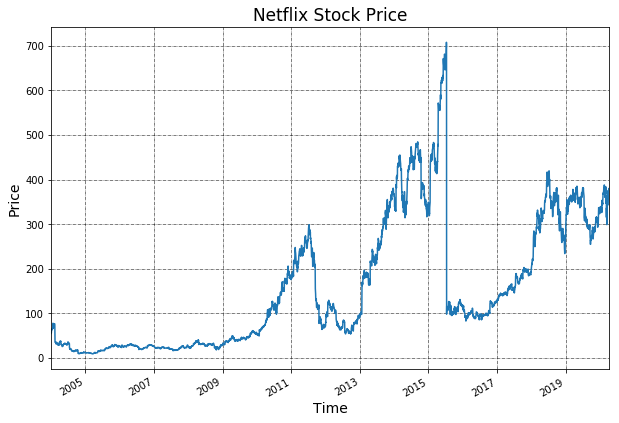

In [10]:
NFLX['Close'].plot(figsize=(10, 7))
plt.title("Netflix Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

### Feature Extraction for Predictinig Stock prices 

### 1. Using Index Fund Nasdaq-100 ETF QQQ's Previous Day & Moving Average price as a feature

In [11]:
QQQ, QQQ_info = ts.get_daily('QQQ', outputsize='full') 
QQQ = QQQ.rename(columns={'1. open' : 'Open', '2. high': 'High', '3. low':'Low', '4. close': 'QQQ_Close', '5. volume': 'Volume' })
QQQ = QQQ.rename_axis(['Date'])
QQQ = QQQ.drop(columns=['Open', 'High', 'Low', 'Volume'])

In [12]:
#sorting index
QQQ = QQQ.sort_index(ascending=True, axis=0)
#slicing the data for 15 years from '2004-01-02' to today
QQQ = QQQ.loc['2004-01-02':]
QQQ

,QQQ_Close
Date,
2004-01-02,36.36
2004-01-05,37.09
2004-01-06,37.34
2004-01-07,37.68
2004-01-08,37.98
...,...
2020-04-03,183.37
2020-04-06,196.48
2020-04-07,196.40


In [13]:
QQQ['QQQ(t-1)'] = QQQ.QQQ_Close.shift(periods=1)
QQQ['QQQ(t-2)'] =  QQQ.QQQ_Close.shift(periods=2)
QQQ['QQQ(t-5)'] =  QQQ.QQQ_Close.shift(periods=5)
QQQ

,QQQ_Close,QQQ(t-1),QQQ(t-2),QQQ(t-5)
Date,,,,
2004-01-02,36.36,NaN,NaN,NaN
2004-01-05,37.09,36.36,NaN,NaN
2004-01-06,37.34,37.09,36.36,NaN
2004-01-07,37.68,37.34,37.09,NaN
2004-01-08,37.98,37.68,37.34,NaN
...,...,...,...,...
2020-04-03,183.37,186.01,182.31,185.30
2020-04-06,196.48,183.37,186.01,192.04
2020-04-07,196.40,196.48,183.37,190.40


In [14]:
QQQ['QQQ_MA10'] = QQQ.QQQ_Close.rolling(window=10).mean()
#QQQ['QQQ_MA10_t'] = QQQ.QQQ_ClosePrev1.rolling(window=10).mean()
QQQ['QQQ_MA20'] = QQQ.QQQ_Close.rolling(window=20).mean()
QQQ['QQQ_MA50'] = QQQ.QQQ_Close.rolling(window=50).mean()

### 2. Creating more features and technical indicators from the Netflix stock itself

### Bollinger Bands

Bollinger Bands allow traders to monitor and take advantage of shifts in price volatilities

#### Main Components of a Bollinger Bands
- Upper Band: The upper band is simply two standard deviations above the moving average of a stock’s price.
- Middle Band: The middle band is simply the moving average of the stock’s price.
- Lower Band: Two standard deviations below the moving average is the lower band.

In [15]:
NFLX['MA_20'] = NFLX.Close.rolling(window=20).mean()
NFLX['SD20'] = NFLX.Close.rolling(window=20).std()
NFLX['Upper_Band'] = NFLX.Close.rolling(window=20).mean() + (NFLX['SD20']*2)
NFLX['Lower_Band'] = NFLX.Close.rolling(window=20).mean() - (NFLX['SD20']*2)
NFLX.tail()

,Open,High,Low,Close,Volume,MA_20,SD20,Upper_Band,Lower_Band
Date,,,,,,,,,
2020-04-03,367.3604,370.90,357.51,361.76,4860768.0,346.67375,21.757366,390.188483,303.159017
2020-04-06,365.2200,380.29,361.71,379.96,8183921.0,348.34725,22.994514,394.336277,302.358223
2020-04-07,380.0000,381.33,369.34,372.28,7046438.0,348.75475,23.358269,395.471288,302.038212
2020-04-08,374.0100,378.39,368.31,371.12,6908879.0,349.81475,23.888932,397.592614,302.036886
2020-04-09,371.0600,372.10,363.03,370.72,7415166.0,352.58825,22.862750,398.313751,306.862749


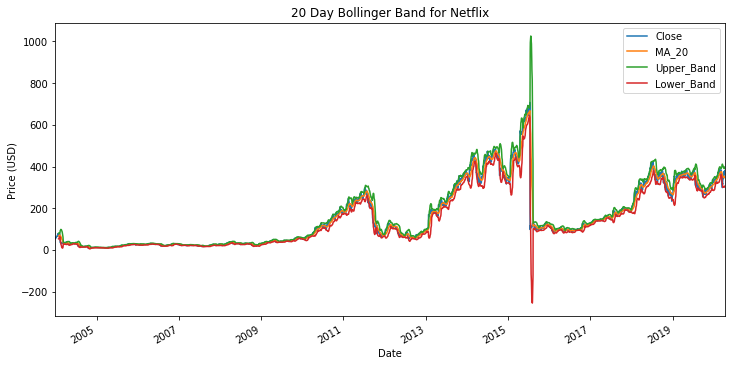

In [16]:
NFLX[['Close', 'MA_20', 'Upper_Band', 'Lower_Band']].plot(figsize=(12,6))
plt.title('20 Day Bollinger Band for Netflix')
plt.ylabel('Price (USD)')
plt.show();

### Shifting for Lagged data - Adding Previous Day prices

In [17]:
NFLX['NFLX_Close(t-1)'] = NFLX.Close.shift(periods=1)
NFLX['NFLX_Close(t-2)'] = NFLX.Close.shift(periods=2)
NFLX['NFLX_Close(t-5)'] = NFLX.Close.shift(periods=5)
NFLX['NFLX_Close(t-10)'] = NFLX.Close.shift(periods=10)
NFLX['NFLX_Open(t-1)'] = NFLX.Open.shift(periods=1)

In [18]:
NFLX.head(20)

,Open,High,Low,Close,Volume,MA_20,SD20,Upper_Band,Lower_Band,NFLX_Close(t-1),NFLX_Close(t-2),NFLX_Close(t-5),NFLX_Close(t-10),NFLX_Open(t-1)
Date,,,,,,,,,,,,,,
2004-01-02,57.500,57.79,53.790,54.830,3587900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-05,54.500,56.86,54.250,55.900,1800500.0,NaN,NaN,NaN,NaN,54.830,NaN,NaN,NaN,57.500
2004-01-06,55.250,60.75,55.120,59.610,3759500.0,NaN,NaN,NaN,NaN,55.900,54.830,NaN,NaN,54.500
2004-01-07,60.300,62.58,59.490,62.240,4888000.0,NaN,NaN,NaN,NaN,59.610,55.900,NaN,NaN,55.250
2004-01-08,63.550,63.90,60.079,62.060,2655600.0,NaN,NaN,NaN,NaN,62.240,59.610,NaN,NaN,60.300
2004-01-09,60.720,64.10,60.420,62.000,2359300.0,NaN,NaN,NaN,NaN,62.060,62.240,54.83,NaN,63.550
2004-01-12,62.240,64.60,61.130,64.050,1918400.0,NaN,NaN,NaN,NaN,62.000,62.060,55.90,NaN,60.720
2004-01-13,64.380,65.52,63.380,65.310,2354500.0,NaN,NaN,NaN,NaN,64.050,62.000,59.61,NaN,62.240
2004-01-14,64.966,66.15,64.200,65.100,1647900.0,NaN,NaN,NaN,NaN,65.310,64.050,62.24,NaN,64.380


### Simple Moving Averages for different periods 

In [19]:
NFLX['MA5'] = NFLX.Close.rolling(window=5).mean()
NFLX['MA10'] = NFLX.Close.rolling(window=10).mean()
NFLX['MA20'] = NFLX.Close.rolling(window=20).mean()
NFLX['MA50'] = NFLX.Close.rolling(window=50).mean()
NFLX['MA200'] = NFLX.Close.rolling(window=200).mean()

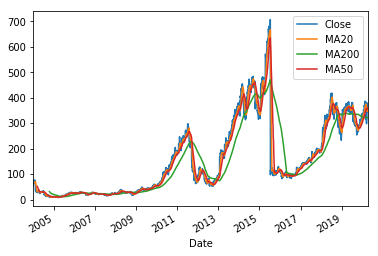

In [20]:
NFLX[['Close', 'MA20', 'MA200', 'MA50']].plot()
plt.show()

### Moving Average Convergance Divergance 

In [21]:
NFLX['EMA_12'] = NFLX.Close.ewm(span=12, adjust=False).mean()
NFLX['EMA_26'] = NFLX.Close.ewm(span=26, adjust=False).mean()
NFLX['MACD'] = NFLX['EMA_12'] - NFLX['EMA_26']

NFLX['MACD_EMA'] = NFLX.MACD.ewm(span=9, adjust=False).mean()

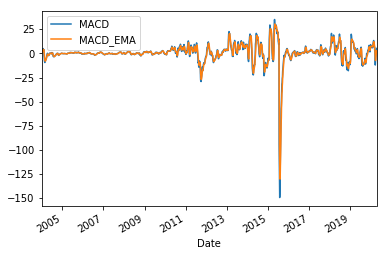

In [22]:
NFLX[['MACD', 'MACD_EMA']].plot()
plt.show()

### Exponential Moving Averages

In [23]:
NFLX['EMA10'] = NFLX.Close.ewm(span=5, adjust=False).mean().fillna(0)
NFLX['EMA20'] = NFLX.Close.ewm(span=5, adjust=False).mean().fillna(0)
NFLX['EMA50'] = NFLX.Close.ewm(span=5, adjust=False).mean().fillna(0)
NFLX['EMA100'] = NFLX.Close.ewm(span=5, adjust=False).mean().fillna(0)
NFLX['EMA200'] = NFLX.Close.ewm(span=5, adjust=False).mean().fillna(0)

### Average True Range

In [24]:
import talib

In [25]:
NFLX['ATR'] = talib.ATR(NFLX['High'].values, NFLX['Low'].values, NFLX['Close'].values, timeperiod=14)

### Average Directional Index

In [26]:
NFLX['ADX'] = talib.ADX(NFLX['High'], NFLX['Low'], NFLX['Close'], timeperiod=14)

### Commodity Channel Index

In [27]:
tp = (NFLX['High'] + NFLX['Low'] + NFLX['Close']) /3
ma = tp/20 
md = (tp-ma)/20
NFLX['CCI'] = (tp-ma)/(0.015 * md)

### Rate of Change

In [28]:
NFLX['ROC'] = ((NFLX['Close'] - NFLX['Close'].shift(10)) / (NFLX['Close'].shift(10)))*100

### Relative Strength Index 

In [29]:
NFLX['RSI'] = talib.RSI(NFLX.Close.values, timeperiod=14)

### William's %R 

In [30]:
NFLX['William%R'] = talib.WILLR(NFLX.High.values, NFLX.Low.values, NFLX.Close.values, 14) 

### Stochastic %K

In [31]:
NFLX['SO%K'] = ((NFLX.Close - NFLX.Low.rolling(window=14).min()) / (NFLX.High.rolling(window=14).max() - NFLX.Low.rolling(window=14).min())) * 100

### Standard Deviation last 5 days returns

In [32]:
NFLX['per_change'] = NFLX.Close.pct_change()
NFLX['STD5'] = NFLX.per_change.rolling(window=5).std()

In [33]:
NFLX.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'MA_20', 'SD20', 'Upper_Band',
       'Lower_Band', 'NFLX_Close(t-1)', 'NFLX_Close(t-2)', 'NFLX_Close(t-5)',
       'NFLX_Close(t-10)', 'NFLX_Open(t-1)', 'MA5', 'MA10', 'MA20', 'MA50',
       'MA200', 'EMA_12', 'EMA_26', 'MACD', 'MACD_EMA', 'EMA10', 'EMA20',
       'EMA50', 'EMA100', 'EMA200', 'ATR', 'ADX', 'CCI', 'ROC', 'RSI',
       'William%R', 'SO%K', 'per_change', 'STD5'],
      dtype='object')

### 3. Using S&P 500 Index 

In [34]:
SnP, SnP_info = ts.get_daily('INX', outputsize='full') 
SnP = SnP.rename(columns={'1. open' : 'Open', '2. high': 'High', '3. low':'Low', '4. close': 'SnP_Close', '5. volume': 'Volume' })
SnP = SnP.rename_axis(['Date'])
SnP = SnP.drop(columns=['Open', 'High', 'Low', 'Volume'])

In [35]:
#sorting index
SnP = SnP.sort_index(ascending=True, axis=0)
#slicing the data for 15 years from '2004-01-02' to today
SnP = SnP.loc['2004-01-02':]
SnP

,SnP_Close
Date,
2004-01-02,1108.4800
2004-01-05,1122.2200
2004-01-06,1123.6700
2004-01-07,1126.3300
2004-01-08,1131.9200
...,...
2020-04-03,2488.6499
2020-04-06,2663.6799
2020-04-07,2659.4099


In [36]:
SnP['SnP(t-1))'] = SnP.SnP_Close.shift(periods=1)
SnP['SnP(t-5)'] =  SnP.SnP_Close.shift(periods=5)
SnP

,SnP_Close,SnP(t-1)),SnP(t-5)
Date,,,
2004-01-02,1108.4800,NaN,NaN
2004-01-05,1122.2200,1108.4800,NaN
2004-01-06,1123.6700,1122.2200,NaN
2004-01-07,1126.3300,1123.6700,NaN
2004-01-08,1131.9200,1126.3300,NaN
...,...,...,...
2020-04-03,2488.6499,2526.8999,2541.4700
2020-04-06,2663.6799,2488.6499,2626.6499
2020-04-07,2659.4099,2663.6799,2584.5901


### Merging of all columns

In [37]:
NFLX = NFLX.merge(QQQ, left_index=True, right_index=True)
NFLX

,Open,High,Low,Close,Volume,MA_20,SD20,Upper_Band,Lower_Band,NFLX_Close(t-1),...,SO%K,per_change,STD5,QQQ_Close,QQQ(t-1),QQQ(t-2),QQQ(t-5),QQQ_MA10,QQQ_MA20,QQQ_MA50
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-02,57.5000,57.79,53.790,54.83,3587900.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,36.36,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-05,54.5000,56.86,54.250,55.90,1800500.0,NaN,NaN,NaN,NaN,54.83,...,NaN,0.019515,NaN,37.09,36.36,NaN,NaN,NaN,NaN,NaN
2004-01-06,55.2500,60.75,55.120,59.61,3759500.0,NaN,NaN,NaN,NaN,55.90,...,NaN,0.066369,NaN,37.34,37.09,36.36,NaN,NaN,NaN,NaN
2004-01-07,60.3000,62.58,59.490,62.24,4888000.0,NaN,NaN,NaN,NaN,59.61,...,NaN,0.044120,NaN,37.68,37.34,37.09,NaN,NaN,NaN,NaN
2004-01-08,63.5500,63.90,60.079,62.06,2655600.0,NaN,NaN,NaN,NaN,62.24,...,NaN,-0.002892,NaN,37.98,37.68,37.34,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-03,367.3604,370.90,357.510,361.76,4860768.0,346.67375,21.757366,390.188483,303.159017,370.08,...,77.091419,-0.022482,0.028771,183.37,186.01,182.31,185.30,184.775,184.3355,207.6386
2020-04-06,365.2200,380.29,361.710,379.96,8183921.0,348.34725,22.994514,394.336277,302.358223,361.76,...,96.325744,0.050310,0.032581,196.48,183.37,186.01,192.04,187.377,184.4810,207.1142
2020-04-07,380.0000,381.33,369.340,372.28,7046438.0,348.75475,23.358269,395.471288,302.038212,379.96,...,83.789092,-0.020213,0.034035,196.40,196.48,183.37,190.40,188.651,184.0955,206.6802


In [38]:
NFLX = NFLX.merge(SnP, left_index=True, right_index=True)
NFLX

,Open,High,Low,Close,Volume,MA_20,SD20,Upper_Band,Lower_Band,NFLX_Close(t-1),...,QQQ_Close,QQQ(t-1),QQQ(t-2),QQQ(t-5),QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5)
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-02,57.5000,57.79,53.790,54.83,3587900.0,NaN,NaN,NaN,NaN,NaN,...,36.36,NaN,NaN,NaN,NaN,NaN,NaN,1108.4800,NaN,NaN
2004-01-05,54.5000,56.86,54.250,55.90,1800500.0,NaN,NaN,NaN,NaN,54.83,...,37.09,36.36,NaN,NaN,NaN,NaN,NaN,1122.2200,1108.4800,NaN
2004-01-06,55.2500,60.75,55.120,59.61,3759500.0,NaN,NaN,NaN,NaN,55.90,...,37.34,37.09,36.36,NaN,NaN,NaN,NaN,1123.6700,1122.2200,NaN
2004-01-07,60.3000,62.58,59.490,62.24,4888000.0,NaN,NaN,NaN,NaN,59.61,...,37.68,37.34,37.09,NaN,NaN,NaN,NaN,1126.3300,1123.6700,NaN
2004-01-08,63.5500,63.90,60.079,62.06,2655600.0,NaN,NaN,NaN,NaN,62.24,...,37.98,37.68,37.34,NaN,NaN,NaN,NaN,1131.9200,1126.3300,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-03,367.3604,370.90,357.510,361.76,4860768.0,346.67375,21.757366,390.188483,303.159017,370.08,...,183.37,186.01,182.31,185.30,184.775,184.3355,207.6386,2488.6499,2526.8999,2541.4700
2020-04-06,365.2200,380.29,361.710,379.96,8183921.0,348.34725,22.994514,394.336277,302.358223,361.76,...,196.48,183.37,186.01,192.04,187.377,184.4810,207.1142,2663.6799,2488.6499,2626.6499
2020-04-07,380.0000,381.33,369.340,372.28,7046438.0,348.75475,23.358269,395.471288,302.038212,379.96,...,196.40,196.48,183.37,190.40,188.651,184.0955,206.6802,2659.4099,2663.6799,2584.5901


In [39]:
NFLX.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'MA_20', 'SD20', 'Upper_Band',
       'Lower_Band', 'NFLX_Close(t-1)', 'NFLX_Close(t-2)', 'NFLX_Close(t-5)',
       'NFLX_Close(t-10)', 'NFLX_Open(t-1)', 'MA5', 'MA10', 'MA20', 'MA50',
       'MA200', 'EMA_12', 'EMA_26', 'MACD', 'MACD_EMA', 'EMA10', 'EMA20',
       'EMA50', 'EMA100', 'EMA200', 'ATR', 'ADX', 'CCI', 'ROC', 'RSI',
       'William%R', 'SO%K', 'per_change', 'STD5', 'QQQ_Close', 'QQQ(t-1)',
       'QQQ(t-2)', 'QQQ(t-5)', 'QQQ_MA10', 'QQQ_MA20', 'QQQ_MA50', 'SnP_Close',
       'SnP(t-1))', 'SnP(t-5)'],
      dtype='object')

In [40]:
# Remove unwanted columns 
NFLX = NFLX.drop(columns=['MA_20', 'per_change', 'EMA_12', 'EMA_26'])

### Force Index and Ease of Movement 

In [41]:
NFLX['ForceIndex1'] = NFLX.Close.diff(1) * NFLX.Volume
NFLX['ForceIndex20'] = NFLX.Close.diff(20) * NFLX.Volume

### Adding the Next day Close Price Column which needs to be predicted using Machine Learning Models

In [42]:
NFLX['NFLX_Close(t+1)'] = NFLX.Close.shift(-1)

In [43]:
NFLX

,Open,High,Low,Close,Volume,SD20,Upper_Band,Lower_Band,NFLX_Close(t-1),NFLX_Close(t-2),...,QQQ(t-5),QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),ForceIndex1,ForceIndex20,NFLX_Close(t+1)
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-02,57.5000,57.79,53.790,54.83,3587900.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1108.4800,NaN,NaN,NaN,NaN,55.90
2004-01-05,54.5000,56.86,54.250,55.90,1800500.0,NaN,NaN,NaN,54.83,NaN,...,NaN,NaN,NaN,NaN,1122.2200,1108.4800,NaN,1.926535e+06,NaN,59.61
2004-01-06,55.2500,60.75,55.120,59.61,3759500.0,NaN,NaN,NaN,55.90,54.83,...,NaN,NaN,NaN,NaN,1123.6700,1122.2200,NaN,1.394775e+07,NaN,62.24
2004-01-07,60.3000,62.58,59.490,62.24,4888000.0,NaN,NaN,NaN,59.61,55.90,...,NaN,NaN,NaN,NaN,1126.3300,1123.6700,NaN,1.285544e+07,NaN,62.06
2004-01-08,63.5500,63.90,60.079,62.06,2655600.0,NaN,NaN,NaN,62.24,59.61,...,NaN,NaN,NaN,NaN,1131.9200,1126.3300,NaN,-4.780080e+05,NaN,62.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-03,367.3604,370.90,357.510,361.76,4860768.0,21.757366,390.188483,303.159017,370.08,364.08,...,185.30,184.775,184.3355,207.6386,2488.6499,2526.8999,2541.4700,-4.044159e+07,-3.504614e+07,379.96
2020-04-06,365.2200,380.29,361.710,379.96,8183921.0,22.994514,394.336277,302.358223,361.76,370.08,...,192.04,187.377,184.4810,207.1142,2663.6799,2488.6499,2626.6499,1.489474e+08,2.739158e+08,372.28
2020-04-07,380.0000,381.33,369.340,372.28,7046438.0,23.358269,395.471288,302.038212,379.96,361.76,...,190.40,188.651,184.0955,206.6802,2659.4099,2663.6799,2584.5901,-5.411664e+07,5.742847e+07,371.12


In [44]:
NFLX.shape

(4096, 46)

In [45]:
NFLX = NFLX.dropna()
NFLX.shape

(3896, 46)

In [47]:
NFLX = NFLX.rename(columns={'Close': 'NFLX_Close(t)'})
NFLX

,Open,High,Low,NFLX_Close(t),Volume,SD20,Upper_Band,Lower_Band,NFLX_Close(t-1),NFLX_Close(t-2),...,QQQ(t-5),QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),ForceIndex1,ForceIndex20,NFLX_Close(t+1)
Date,,,,,,,,,,,,,,,,,,,,,
2004-10-18,10.6000,10.66,9.85,9.87,12295000.0,2.216304,20.726608,11.861392,10.30,17.43,...,35.75,35.910,35.5520,34.7318,1114.0200,1108.2000,1124.3900,-5.286850e+06,-9.700755e+07,9.93
2004-10-19,9.9900,10.09,9.67,9.93,7863200.0,2.610476,21.135952,10.694048,9.87,10.30,...,35.69,35.862,35.5675,34.7934,1103.2300,1114.0200,1121.8400,4.717920e+05,-5.960306e+07,10.10
2004-10-20,9.9900,10.30,9.95,10.10,3084300.0,2.903165,21.383830,9.771170,9.93,9.87,...,35.61,35.802,35.6225,34.8502,1103.6600,1103.2300,1113.6500,5.243310e+05,-2.081903e+07,10.07
2004-10-21,10.2900,10.35,9.97,10.07,2891400.0,3.134799,21.510599,8.971401,10.10,9.93,...,35.45,35.838,35.7065,34.9238,1106.4900,1103.6600,1103.2900,-8.674200e+04,-1.945912e+07,9.80
2004-10-22,10.1000,10.15,9.72,9.80,2862100.0,3.340229,21.578958,8.218042,10.07,10.10,...,35.63,35.860,35.7565,34.9904,1095.7400,1106.4900,1108.2000,-7.727670e+05,-1.960538e+07,9.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-02,364.0800,370.99,360.06,370.08,4592477.0,22.077859,391.189968,302.878532,364.08,375.50,...,191.90,183.508,185.5680,208.4630,2526.8999,2470.5000,2630.0701,2.755486e+07,-1.239969e+07,361.76
2020-04-03,367.3604,370.90,357.51,361.76,4860768.0,21.757366,390.188483,303.159017,370.08,364.08,...,185.30,184.775,184.3355,207.6386,2488.6499,2526.8999,2541.4700,-4.044159e+07,-3.504614e+07,379.96
2020-04-06,365.2200,380.29,361.71,379.96,8183921.0,22.994514,394.336277,302.358223,361.76,370.08,...,192.04,187.377,184.4810,207.1142,2663.6799,2488.6499,2626.6499,1.489474e+08,2.739158e+08,372.28


### Extract Features from Date

In [52]:
NFLX['Date_Col'] = NFLX.index

In [74]:
from datetime import datetime

def extract_date_features(date_val):
    
    Day = date_val.day
    DayofWeek = date_val.dayofweek
    Dayofyear = date_val.dayofyear
    Week = date_val.week
    Is_month_end = date_val.is_month_end.real
    Is_month_start = date_val.is_month_start.real
    Is_quarter_end = date_val.is_quarter_end.real
    Is_quarter_start = date_val.is_quarter_start.real
    Is_year_end = date_val.is_year_end.real
    Is_year_start = date_val.is_year_start.real
    Is_leap_year = date_val.is_leap_year.real
    Year = date_val.year
    Month = date_val.month
    
    return Day, DayofWeek, Dayofyear, Week, Is_month_end, Is_month_start, Is_quarter_end, Is_quarter_start, Is_year_end, Is_year_start, Is_leap_year, Year, Month

In [77]:
funct = lambda x: pd.Series(extract_date_features(x))
NFLX[['Day', 'DayofWeek', 'DayofYear', 'Week', 'Is_month_end', 'Is_month_start',
      'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Is_leap_year', 'Year', 'Month']] = NFLX.Date_Col.apply(funct)

In [78]:
NFLX

,Open,High,Low,NFLX_Close(t),Volume,SD20,Upper_Band,Lower_Band,NFLX_Close(t-1),NFLX_Close(t-2),...,Week,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Is_leap_year,Year,Month
Date,,,,,,,,,,,,,,,,,,,,,
2004-10-18,10.6000,10.66,9.85,9.87,12295000.0,2.216304,20.726608,11.861392,10.30,17.43,...,43,0,0,0,0,0,0,1,2004,10
2004-10-19,9.9900,10.09,9.67,9.93,7863200.0,2.610476,21.135952,10.694048,9.87,10.30,...,43,0,0,0,0,0,0,1,2004,10
2004-10-20,9.9900,10.30,9.95,10.10,3084300.0,2.903165,21.383830,9.771170,9.93,9.87,...,43,0,0,0,0,0,0,1,2004,10
2004-10-21,10.2900,10.35,9.97,10.07,2891400.0,3.134799,21.510599,8.971401,10.10,9.93,...,43,0,0,0,0,0,0,1,2004,10
2004-10-22,10.1000,10.15,9.72,9.80,2862100.0,3.340229,21.578958,8.218042,10.07,10.10,...,43,0,0,0,0,0,0,1,2004,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-02,364.0800,370.99,360.06,370.08,4592477.0,22.077859,391.189968,302.878532,364.08,375.50,...,14,0,0,0,0,0,0,1,2020,4
2020-04-03,367.3604,370.90,357.51,361.76,4860768.0,21.757366,390.188483,303.159017,370.08,364.08,...,14,0,0,0,0,0,0,1,2020,4
2020-04-06,365.2200,380.29,361.71,379.96,8183921.0,22.994514,394.336277,302.358223,361.76,370.08,...,15,0,0,0,0,0,0,1,2020,4


In [79]:
NFLX.columns

Index(['Open', 'High', 'Low', 'NFLX_Close(t)', 'Volume', 'SD20', 'Upper_Band',
       'Lower_Band', 'NFLX_Close(t-1)', 'NFLX_Close(t-2)', 'NFLX_Close(t-5)',
       'NFLX_Close(t-10)', 'NFLX_Open(t-1)', 'MA5', 'MA10', 'MA20', 'MA50',
       'MA200', 'MACD', 'MACD_EMA', 'EMA10', 'EMA20', 'EMA50', 'EMA100',
       'EMA200', 'ATR', 'ADX', 'CCI', 'ROC', 'RSI', 'William%R', 'SO%K',
       'STD5', 'QQQ_Close', 'QQQ(t-1)', 'QQQ(t-2)', 'QQQ(t-5)', 'QQQ_MA10',
       'QQQ_MA20', 'QQQ_MA50', 'SnP_Close', 'SnP(t-1))', 'SnP(t-5)',
       'ForceIndex1', 'ForceIndex20', 'NFLX_Close(t+1)', 'Date_Col', 'Day',
       'DayofWeek', 'DayofYear', 'Week', 'Is_month_end', 'Is_month_start',
       'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start',
       'Is_leap_year', 'Year', 'Month'],
      dtype='object')

In [80]:
NFLX.shape

(3896, 60)

#### I have extracted some 55 new features for Predicting stock prices. Some analyses short term trend, some tells us about long term trends.  I will now build Machine Learning models based on these features

### Save the Features in CSV

In [81]:
NFLX.to_csv('NETFLIX.csv')

### License
MIT License

Copyright (c) 2020 Nikhil Kohli

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.